In [40]:
## Machine Learning Online Class
#  Exercise 5 | Regularized Linear Regression and Bias-Variance
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     linearRegCostFunction.m
#     learningCurve.m
#     validationCurve.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

import numpy as np
import scipy.io as scio
import scipy.optimize as optimize
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 加载和可视化数据

Loading and Visualizing Data ...



Text(0,0.5,'Water flowing out of the dam (y)')

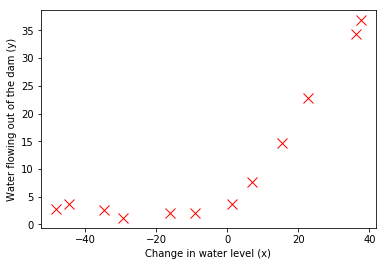

In [77]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = scio.loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

# m = Number of examples
m = len(X)

# Plot training data
plt.plot(X, y, 'rx', markersize = 10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

In [64]:
def linearRegCostFunction(theta, X, y, plambda): # theta needs to be the first parameter
    #LINEARREGCOSTFUNCTION Compute cost for regularized linear 
    #regression with multiple variables
    #   J = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
    #   cost of using theta as the parameter for linear regression to fit the 
    #   data points in X and y. Returns the cost in J 

    # Initialize some useful values
    m = len(y); # number of training examples
    theta = theta.reshape(-1,1)
    
    # You need to return the following variables correctly 
    J = 0;
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of regularized linear 
    #               regression for a particular choice of theta.
    #
    #               You should set J to the cost
    #
    h = X.dot(theta)
    theta_reg = theta[1:,]

    J = 0.5 * np.sum(np.square(h-y))/m + 0.5 * plambda * np.sum(np.square(theta_reg))/m
    return J

# 2. 带正则化惩罚的线性回归损失函数

In [66]:
## =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 
#

theta = np.ones((2,1))
J = linearRegCostFunction(theta, np.column_stack((np.ones((m, 1)),X)), y, 1);

print('Cost at theta = [1 ; 1]: %f '\
         '\n(this value should be about 303.993192)\n'%J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)



In [148]:
def linearRegGradient(theta, X, y, plambda): # theta needs to be the first parameter
    # to be passed to optimize functions, calculate gradient separately
    #LINEARREGGRADIENT Compute gradient for regularized linear 
    #regression with multiple variables
    #   grad = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
    #   gradient of using theta as the parameter for linear regression to fit the 
    #   data points in X and y. Returns the gradient in grad

    # Initialize some useful values

    m = len(y); # number of training examples
    theta = theta.reshape(-1,1)
    
    # You need to return the following variables correctly 
    grad = np.zeros(len(theta))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost and gradient of regularized linear 
    #               regression for a particular choice of theta.
    #
    #               You should set J to the cost and grad to the gradient.
    #
    h = X.dot(theta)
    theta_reg = theta[1:,]

    grad = X.T.dot(h-y)/m 
    grad[1:] += plambda * theta_reg / m
    return grad.ravel()

# 3. 带正则化惩罚的线性回归梯度

In [149]:
## =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.
#

theta = np.ones((2,1))
grad = linearRegGradient(theta, np.column_stack((np.ones((m, 1)),X)), y, 1)

print('Gradient at theta = [1 ; 1]:  [%f; %f] '\
         '\n(this value should be about [-15.303016; 598.250744])\n'\
         %(grad[0], grad[1]))

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])



# 4. 训练线性回归

In [71]:
def trainLinearReg(X, y, plambda):
    #TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
    #regularization parameter lambda
    #   [theta] = TRAINLINEARREG (X, y, lambda) trains linear regression using
    #   the dataset (X, y) and regularization parameter lambda. Returns the
    #   trained parameters theta.
    #

    # Initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))
    
    '''# Create "short hand" for the cost function to be minimized
    costFunction = @(t) linearRegCostFunction(X, y, t, lambda);

    # Now, costFunction is a function that takes in only one argument
    options = optimset('MaxIter', 200, 'GradObj', 'on');'''
    #print(X.shape)
    # Minimize using fmincg
    theta = optimize.fmin_cg(linearRegCostFunction, initial_theta.ravel(), fprime = linearRegGradient, args = (X, y, plambda), maxiter = 200);
    return theta

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


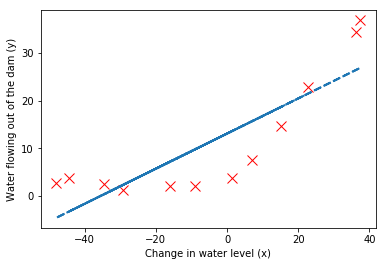

In [76]:
## =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with lambda = 0
plambda = 0;
theta = trainLinearReg(np.column_stack((np.ones((m, 1)),X)), y, plambda)

#  Plot fit over the data
plt.plot(X, y, 'rx', markerSize = 10, linewidth = 1.5)
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.plot(X, np.column_stack((np.ones((m, 1)),X)).dot(theta), linestyle = '--', lineWidth = 2)
plt.show()

# 5. 线性回归的学习曲线

In [99]:
def learningCurve(X, y, Xval, yval, plambda):
    #LEARNINGCURVE Generates the train and cross validation set errors needed 
    #to plot a learning curve
    #   [error_train, error_val] = ...
    #       LEARNINGCURVE(X, y, Xval, yval, lambda) returns the train and
    #       cross validation set errors for a learning curve. In particular, 
    #       it returns two vectors of the same length - error_train and 
    #       error_val. Then, error_train(i) contains the training error for
    #       i examples (and similarly for error_val(i)).
    #
    #   In this function, you will compute the train and test errors for
    #   dataset sizes from 1 up to m. In practice, when working with larger
    #   datasets, you might want to do this in larger intervals.
    #

    # Number of training examples
    m = len(X)

    # You need to return these values correctly
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return training errors in 
    #               error_train and the cross validation errors in error_val. 
    #               i.e., error_train(i) and 
    #               error_val(i) should give you the errors
    #               obtained after training on i examples.
    #
    # Note: You should evaluate the training error on the first i training
    #       examples (i.e., X(1:i, :) and y(1:i)).
    #
    #       For the cross-validation error, you should instead evaluate on
    #       the _entire_ cross validation set (Xval and yval).
    #
    # Note: If you are using your cost function (linearRegCostFunction)
    #       to compute the training and cross validation error, you should 
    #       call the function with the lambda argument set to 0. 
    #       Do note that you will still need to use lambda when running
    #       the training to obtain the theta parameters.
    #
    # Hint: You can loop over the examples with the following:
    #
    #       for i = 1:m
    #           # Compute train/cross validation errors using training examples 
    #           # X(1:i, :) and y(1:i), storing the result in 
    #           # error_train(i) and error_val(i)
    #           ....
    #           
    #       end
    #

    # ---------------------- Sample Solution ----------------------
    for i in range(1,m+1):
        theta = trainLinearReg(X[:i], y[:i], plambda) # X already contains bias unit
        error_train[i-1] = linearRegCostFunction(theta,X[:i],y[:i],plambda=0)
        error_val[i-1] = linearRegCostFunction(theta,Xval,yval,plambda=0)
    
    return error_train, error_val

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/use

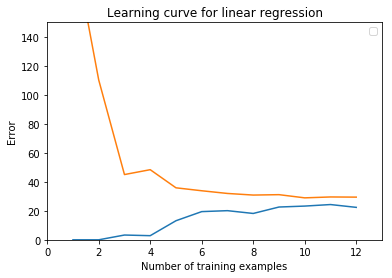

In [101]:
## =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
#

plambda = 0;
error_train, error_val = \
    learningCurve(np.column_stack((np.ones((m, 1)),X)), y, \
                  np.column_stack((np.ones((len(Xval), 1)),Xval)), yval, \
                  plambda)

plt.plot(range(1,m+1), error_train, range(1,m+1), error_val);
plt.title('Learning curve for linear regression')
plt.legend('Train', 'Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(m):
    print('  \t%d\t\t%f\t%f\n'%(i+1, error_train[i], error_val[i]))

# 6. 多项式的特征映射

In [201]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    mu = np.mean(X, axis =0); # mu should be a vector
    #X_norm = bsxfun(@minus, X, mu); 
    X_norm = X-mu

    sigma = np.std(X_norm, axis = 0);
    #X_norm = bsxfun(@rdivide, X_norm, sigma);
    X_norm = X_norm / sigma

    return X_norm, mu, sigma

In [139]:
def polyFeatures(X, p):
    #POLYFEATURES Maps X (1D vector) into the p-th power
    #   [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
    #   maps each example into its polynomial features where
    #   X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    #


    # You need to return the following variables correctly.
    X_poly = np.zeros((X.size, p))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Given a vector X, return a matrix X_poly where the p-th 
    #               column of X contains the values of X to the p-th power.
    #
    # 
    #X_poly = np.array([np.power(X,i+1) for i in range(p)]) # result is a p*m*1 ndarray, how to correct it?
    for i in range(p):
        X_poly[:,i] = np.power(X,i+1).reshape(1,-1)
    
    return X_poly


In [203]:
## =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8;

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
X_poly, mu, sigma = featureNormalize(X_poly);  # Normalize
X_poly = np.column_stack((np.ones((m, 1)), X_poly))                   # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
#X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = X_poly_test - mu
#X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones((len(X_poly_test), 1)), X_poly_test))         # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
#X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = X_poly_val - mu
#X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones((len(X_poly_val), 1)), X_poly_val))           # Add Ones

print('Normalized Training Example 1:\n');
print(X_poly[0, :]);

Normalized Training Example 1:

[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


# 7. 多项式线性回归的学习曲线

In [210]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    #PLOTFIT Plots a learned polynomial regression fit over an existing figure.
    #Also works with linear regression.
    #   PLOTFIT(min_x, max_x, mu, sigma, theta, p) plots the learned polynomial
    #   fit with power p and feature normalization (mu, sigma).

    # Hold on to the current figure
    #hold on;

    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05)#.reshape(-1,1)
    #x = np.linspace(min_x - 15, max_x + 25).reshape(-1,1)
    #x = np.arange(min_x - 10, max_x + 10, 0.05)

    # Map the X values 
    X_poly = polyFeatures(x, p);
    #X_poly = bsxfun(@minus, X_poly, mu);
    X_poly = X_poly - mu
    X_poly = X_poly / sigma

    # Add ones
    X_poly = np.column_stack((np.ones((len(x), 1)), X_poly))

    # Plot
    plt.plot(x, X_poly.dot(theta), '--', linewidth = 2)



λ = 0

         Current function value: 0.071643
         Iterations: 200
         Function evaluations: 368
         Gradient evaluations: 368
[ 11.21752244  10.33552508  16.98899166  15.021692   -25.11298696
 -28.82939294  21.75545237  17.98119624  -5.11593357]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current functio

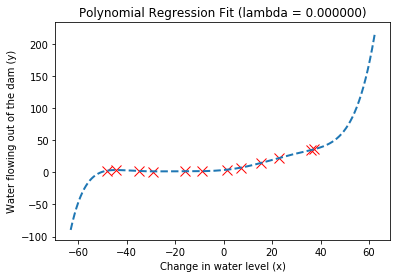

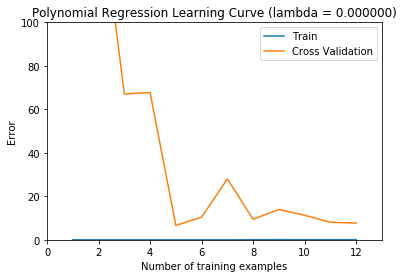

In [214]:
## =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with 
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.
#

plambda = 0;
theta = trainLinearReg(X_poly, y, plambda);
print(theta)

# Plot training data and fit
plt.figure(1);
plt.plot(X, y, 'rx', markerSize = 10, linewidth = 1.5)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p);
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.title ('Polynomial Regression Fit (lambda = %f)'%plambda);

plt.figure(2);
error_train, error_val = \
    learningCurve(X_poly, y, X_poly_val, yval, plambda);
plt.plot(range(1,m+1), error_train, range(1,m+1), error_val);

plt.title('Polynomial Regression Learning Curve (lambda = %f)'%plambda);
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n\n'%plambda);
print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(m):
    print('  \t%d\t\t%f\t%f\n'%(i+1, error_train[i], error_val[i]));


λ = 1

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62
[ 11.21759102   8.36726009   5.10195865   3.39010324   2.15887494
   1.62044372   0.97249263   1.02577129   0.32263364]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 22
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 17
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminat

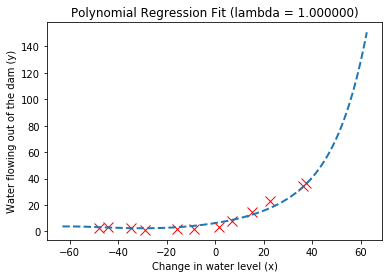

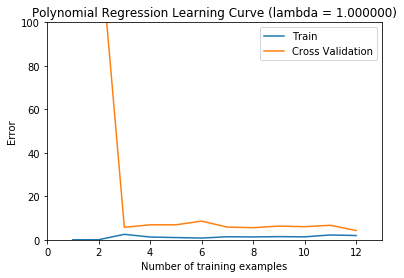

In [230]:
plambda = 1;
theta = trainLinearReg(X_poly, y, plambda);
print(theta)

# Plot training data and fit
plt.figure(1);
plt.plot(X, y, 'rx', markerSize = 10, linewidth = 1.5)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p);
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.title ('Polynomial Regression Fit (lambda = %f)'%plambda);

plt.figure(2);
error_train, error_val = \
    learningCurve(X_poly, y, X_poly_val, yval, plambda);
plt.plot(range(1,m+1), error_train, range(1,m+1), error_val);

plt.title('Polynomial Regression Learning Curve (lambda = %f)'%plambda);
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n\n'%plambda);
print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(m):
    print('  \t%d\t\t%f\t%f\n'%(i+1, error_train[i], error_val[i]));


λ = 100

Optimization terminated successfully.
         Current function value: 65.950955
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17
[ 11.21758933   0.99128451   0.3410157    0.76526037   0.1568759
   0.56654377   0.02895654   0.42467798  -0.05196792]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.114717
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 112.255156
         Iterations: 13
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 131.638608
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated 

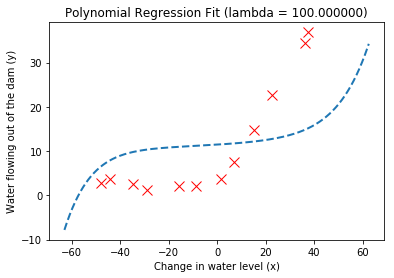

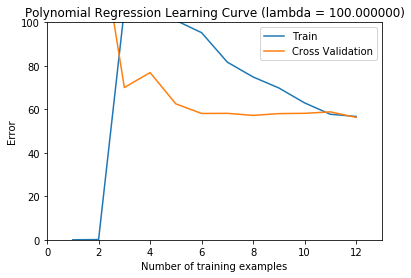

In [231]:
plambda = 100;
theta = trainLinearReg(X_poly, y, plambda);
print(theta)

# Plot training data and fit
plt.figure(1);
plt.plot(X, y, 'rx', markerSize = 10, linewidth = 1.5)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p);
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.title ('Polynomial Regression Fit (lambda = %f)'%plambda);

plt.figure(2);
error_train, error_val = \
    learningCurve(X_poly, y, X_poly_val, yval, plambda);
plt.plot(range(1,m+1), error_train, range(1,m+1), error_val);

plt.title('Polynomial Regression Learning Curve (lambda = %f)'%plambda);
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n\n'%plambda);
print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(m):
    print('  \t%d\t\t%f\t%f\n'%(i+1, error_train[i], error_val[i]));


# 8. 验证和选择λ 

In [228]:
def validationCurve(X, y, Xval, yval):
    #VALIDATIONCURVE Generate the train and validation errors needed to
    #plot a validation curve that we can use to select lambda
    #   [lambda_vec, error_train, error_val] = ...
    #       VALIDATIONCURVE(X, y, Xval, yval) returns the train
    #       and validation errors (in error_train, error_val)
    #       for different values of lambda. You are given the training set (X,
    #       y) and validation set (Xval, yval).
    #

    # Selected values of lambda (you should not change this)
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return training errors in 
    #               error_train and the validation errors in error_val. The 
    #               vector lambda_vec contains the different lambda parameters 
    #               to use for each calculation of the errors, i.e, 
    #               error_train(i), and error_val(i) should give 
    #               you the errors obtained after training with 
    #               lambda = lambda_vec(i)
    #
    # Note: You can loop over lambda_vec with the following:
    #
    #       for i = 1:length(lambda_vec)
    #           lambda = lambda_vec(i);
    #           # Compute train / val errors when training linear 
    #           # regression with regularization parameter lambda
    #           # You should store the result in error_train(i)
    #           # and error_val(i)
    #           ....
    #           
    #       end
    #
    #
    for i in range(len(lambda_vec)):
        plambda = lambda_vec[i]
        theta_i = trainLinearReg(X, y , plambda)
        error_train[i] = linearRegCostFunction(theta_i, X, y, plambda)
        error_val[i] = linearRegCostFunction(theta_i, Xval, yval, plambda)
    return lambda_vec, error_train, error_val


         Current function value: 0.071643
         Iterations: 200
         Function evaluations: 368
         Gradient evaluations: 368
         Current function value: 0.169430
         Iterations: 200
         Function evaluations: 392
         Gradient evaluations: 392
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 185
         Function evaluations: 364
         Gradient evaluations: 364
Optimization terminated successfully.
         Current function value: 0.371283
         Iterations: 143
         Function evaluations: 267
         Gradient evaluations: 267
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 123
         Function evaluations: 221
         Gradient evaluations: 221
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 83
         Function evaluations: 154
         Gradient evaluations: 154
Optimization terminated suc

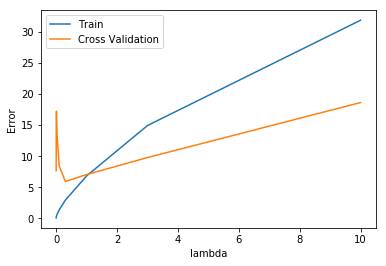

lambda		Train Error	Validation Error

 0.000000	0.071643	7.671541

 0.001000	0.169430	9.503150

 0.003000	0.243172	15.983101

 0.010000	0.371283	17.237812

 0.030000	0.636703	13.424000

 0.100000	1.360572	8.453575

 0.300000	2.917649	5.932030

 1.000000	6.830463	7.047226

 3.000000	14.937646	9.782200

 10.000000	31.878154	18.633922



In [229]:
## =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of 
#  lambda on a validation set. You will then use this to select the
#  "best" lambda value.
#

lambda_vec, error_train, error_val = \
    validationCurve(X_poly, y, X_poly_val, yval);


plt.plot(lambda_vec, error_train, lambda_vec, error_val);
plt.legend(['Train', 'Cross Validation']);
plt.xlabel('lambda');
plt.ylabel('Error');
plt.show()

print('lambda\t\tTrain Error\tValidation Error\n');
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f\n'\
            %(lambda_vec[i], error_train[i], error_val[i]))
